# Wine Quality Classification (Multi-Class Classification)
Objective: Using chemical analysis to determine the origin of wines

### Data Processing

Import the dataset from UCI Machine Learning Repository. ucimlrepo python package is used to easily import the dataset into the notebook

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

TODO - Add a bit of EDA to crosscheck the dataset values - whether some are empty, duplicated, the correlation between them and whether to include all of them or not

In [4]:
print(X)
print(X.duplicated())

     Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23       1.71  2.43               15.6        127           2.80   
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_i

In [5]:
print(y)

     class
0        1
1        1
2        1
3        1
4        1
..     ...
173      3
174      3
175      3
176      3
177      3

[178 rows x 1 columns]


In [6]:
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


Print the labels present in the target class

In [7]:
class_labels = y['class'].unique()
print(class_labels)

[1 2 3]


Split the data into train and test sets

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True)

Use MinMaxScaler to normalize the data

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X_train_normalized = scaler.fit_transform(X_train)

Normalization is done after train-test split to ensure that there is no leakage of data between the train and test sets.

To ensure that all the input and target are in the same format, convert the targets to numpy arrays. (the input data is automatically converted to numpy array when the scaler is applied on them)

In [10]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [11]:
print(type(X_train_normalized), type(y_train), type(y_test)) # ensuring that all variables are in same format

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


Perform one-hot encoding on the target variables

In [12]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train)  # do for both train and test targets
y_test_encoded = encoder.fit_transform(y_test)

### Creating the ANN

Import neccessary modules for building the model

In [13]:
import tensorflow as tf

In [14]:
from keras.layers import Dense, Input
from keras.models import Sequential

Build a simple model with 2 hidden layers

In [15]:
model = Sequential([
    Input(shape=(13,)),
    Dense(units=32,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=3,activation='softmax')
])


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,755 (10.76 KB)

 Trainable params: 2,755 (10.76 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model by specifying optimizer, loss functions and metrics

In [17]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['acc']
)

### Training the ANN

Train the ANN for 30 epochs in 16 batches, with a validation split of 10%

In [18]:
model.fit(X_train_normalized,y_train_encoded,batch_size=16,epochs=30,validation_split=0.1)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - acc: 0.2515 - loss: 1.2236 - val_acc: 0.2857 - val_loss: 1.1274
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2611 - loss: 1.1211 - val_acc: 0.6429 - val_loss: 1.0577
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.6554 - loss: 1.0549 - val_acc: 0.7857 - val_loss: 1.0059
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6617 - loss: 1.0005 - val_acc: 0.7857 - val_loss: 0.9509
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7094 - loss: 0.9539 - val_acc: 0.7857 - val_loss: 0.8908
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7151 - loss: 0.9074 - val_acc: 0.9286 - val_loss: 0.8211
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8717 - loss: 0.8425 - val_acc: 0.9286 - val_loss: 0.7414
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8886 - loss: 0.7504 - val_acc: 1.0000 - val_loss: 0.6583
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9523 - loss: 0.6923 - val_acc:

### NN evaluation

Normalize the test input data

In [19]:
X_test_normalized = scaler.fit_transform(X_test)

Evaluate the model and get the test loss and accuracy

In [20]:
test_loss, test_acc = model.evaluate(X_test_normalized, y_test_encoded)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9095 - loss: 0.1863 
Test accuracy: 0.9111
Test loss: 0.1783


### NN Predictions

In [21]:
# importing numpy library

import numpy as np

Get the inference for the test input data set

In [53]:
predictions = model.predict(X_test_normalized) # Gives the probabilities of each sample belonging to either of the classes

# Convert the probabilities into labels based on which class probability is highest
rounded_predictions = np.argmax(predictions, axis = -1)
predicted_label = rounded_predictions # saving it for future use

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


Convert it into one-hot encoded labels for ease in comparison to existing test labels

In [25]:
rounded_predictions = (predictions > 0.5).astype(int) # threshold is chosen as 0.5


Print the classification report

In [26]:
from sklearn.metrics import classification_report
report = classification_report(y_test_encoded, rounded_predictions, target_names=["Class 1","Class 2", "Class 3"])

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     Class 1       1.00      0.94      0.97        17
     Class 2       0.93      0.82      0.88        17
     Class 3       0.85      1.00      0.92        11

   micro avg       0.93      0.91      0.92        45
   macro avg       0.93      0.92      0.92        45
weighted avg       0.94      0.91      0.92        45
 samples avg       0.91      0.91      0.91        45



* Precision is high across all classes, especially for Class 1 with 1.00, meaning the model predicts very few false positives.
* Recall for Class 1 (0.86) is somewhat lower than for Class 3 (0.94), indicating that the model might miss a few Class 1 instances but is good at capturing Class 3.
* The F1-Scores are all strong (ranging from 0.84 to 0.92), showing a balanced performance between Precision and Recall.


### Confusion matrix

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [54]:
# Converting the predicted one-hot encoded labels back to labels among 1, 2 or 3

decoded_label = []
for i in predicted_label:
  i = i+1
  decoded_label.append(i)

# Converting the predicted label list into a numpy array
decoded_label = np.array(decoded_label)

In [56]:
cm = confusion_matrix(y_test.reshape(-1), decoded_label)

In [57]:
print(cm)

[[16  1  0]
 [ 1 14  2]
 [ 0  0 11]]


Display the Confusion Matrix

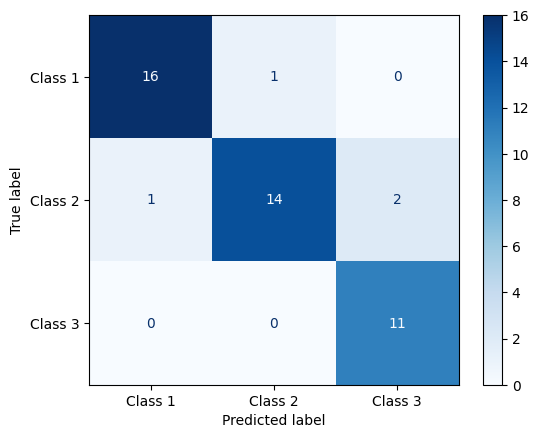

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib as plt

disp = ConfusionMatrixDisplay(cm, display_labels=['Class 1','Class 2','Class 3'])

disp.plot(cmap = plt.cm.Blues)

### Save and load the model

Saving the whole model (architecture and weights) as .hdf5 file

In [58]:
import os.path

# Check if model is already saved, if not then save the model in .hdf5 format
if not os.path.isfile('models/wine_classification.hdf5'):
  model.save('models/wine_classification.hdf5')

Loading the saved model

In [64]:
from tensorflow.keras.models import load_model

new_model = load_model('models/wine_classification.hdf5')

In [65]:
# Print the summary to verify model architecture

new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,757 (10.77 KB)

 Trainable params: 2,755 (10.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [66]:
# Print the model weights

new_model.get_weights()

[array([[-2.66725987e-01,  3.78681749e-01, -1.09671712e-01,
          4.90390084e-06,  3.21155459e-01,  8.93033743e-02,
         -3.18250537e-01, -4.76735532e-02,  3.67463946e-01,
          3.35702837e-01, -3.62402201e-02,  1.45573299e-02,
          3.45092952e-01,  1.82026088e-01, -2.56043762e-01,
          3.74916643e-01, -2.15967864e-01, -3.09194565e-01,
          7.42817074e-02,  1.30360872e-01,  2.04679281e-01,
          2.50519127e-01,  4.27296609e-01,  2.39027396e-01,
         -3.10722440e-01,  3.75044256e-01, -1.57586426e-01,
          2.95460314e-01,  1.31678700e-01, -3.01736712e-01,
         -2.48754337e-01, -7.31292963e-02],
        [ 1.02776706e-01, -1.28598288e-01,  9.15282071e-02,
         -1.33573011e-01,  2.45557144e-01, -2.56890059e-01,
          1.94068536e-01, -1.09075785e-01,  4.87214059e-01,
         -1.24413848e-01,  2.39097476e-01,  2.57410318e-01,
          2.91997138e-02, -3.10439199e-01,  1.55505955e-01,
          3.47651899e-01, -2.12751061e-01, -3.42869490e-